In [13]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

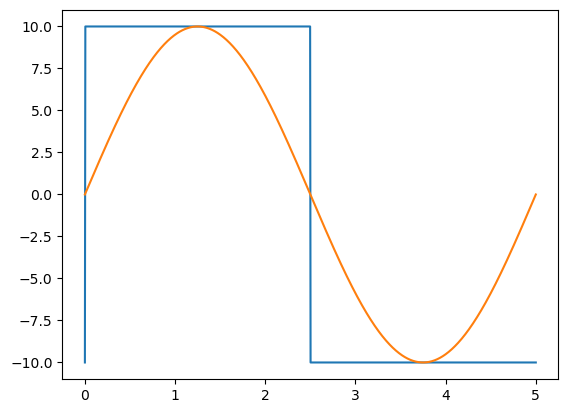

In [93]:
temps=np.linspace(0,T,1000)
E=10 #amplitude
T=5 # période
def u(temps,E,T):
    U=[]
    S=[]
    for t in temps:
        S.append(E*np.sin(2*np.pi*t*(1/T)))
        if np.sin(2*np.pi*t*(1/T))> 0:
            U.append(E)
        else:
            U.append(-E)
    return U,S

U,S=u(temps,E,T)
plt.plot(temps,U)
plt.plot(temps,S)

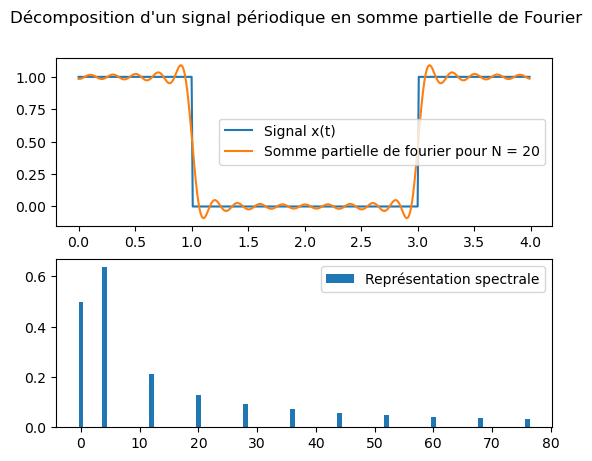

In [94]:
# Décomposition fourier

import numpy as np
import matplotlib.pyplot as plt
import time


T0 = 4          # Période
f0 = 1/T0       # Fréquence
t_max = T0      # programme à Corriger si t_max <> T0 (dans le calcul d'intégral)
dt = 0.01       # pas de calcul de l'intégrale et de l'affichage graphique

T = np.arange(0,t_max,dt)  # Vecteur temps
n = len(T)


########### Construction de la fenêtre graphique (et division)

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle("Décomposition d'un signal périodique en somme partielle de Fourier")


############ Construction et affichage du signal x(t)

X = (np.cos(2*np.pi*f0*T) > 0)*1  # [Bool]*1 transforme le tableau de booléen en tableau de 0 et 1
ax1.plot(T,X, label='Signal x(t)')


############ Construction et affichage de la projection (Fourier) jusqu'à N

N = 20


# Coefficients de fourier a[k] et b[k]. Ecriture alternative module/phase c[k] (et Phi_n)

a = [ sum(X)*dt /T0 ]   # a0
b = [0]                 # b0

c = [abs(a[0])]         # c0

#phi = []              # phi0

for k in range(1,N):
    a.append( sum(X*np.cos( 2*np.pi*f0*k*T ))*dt *2/T0 )    # calcul des coefficients a_n
    b.append( sum(X*np.sin( 2*np.pi*f0*k*T ))*dt *2/T0 )    # calcul des coefficients b_n
    
    c.append( np.sqrt( a[-1]**2 + b[-1]**2 ))               # calcul des coefficients c_n
    # phi.append(...)

Y = [a[0]]*len(T)    # Décomposition de Fourier
#ax1.plot(T,Y)

for k in range(1,N):
    Y += a[k]*np.cos( 2*np.pi*f0*k*T ) 
    Y += b[k]*np.sin( 2*np.pi*f0*k*T )   # Y est la somme des a_k cos(2*pi*f0 k*t) + b_k sin(2*pi*f0 k*t)
   
    
ax1.plot(T,Y,label=f'Somme partielle de fourier pour N = {N}')
ax1.legend()


############ Affichage de l'espace des Phases jusqu'à N

T_Z = np.asarray(list(range(N)))*T0  

# T_Z est un vecteur ligne contenant les phases k*f0 (en abscisse)
# c contient les amplitudes

ax2.bar(T_Z,c, label='Représentation spectrale')
ax2.legend()



